# Titanic Data Set

## Load and Explore Data

I chose the Titanic data set as the topic for my final project. It appealed to me for several reasons. One of which is that my son loves everything about the Titianic, and knows more than that. But its interest is more universal than that. It is the most infamous naval disaster of our time. Our intellect and emotions are involved in the search for info about the actual human lives lost and saved in this epic.

So the first thing I did is import libraries needed, set preferences, and load the data into something malleable. I am using pandas dataframes for my data set. I also set pylab to inline so any visuals will be shown here. I wanted to be able to see more of the data set since it&apos;s not too large, so I set the max amount of rows to display at 500. Lastly I called the newly formed data set head method to test my efforts.

In [1]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
%config InlineBackend.figure_format = 'retina'

#set preferences
%pylab inline
pd.set_option('display.max_rows', 500)

#load data and create dataframe
filename = 'C:/Users/cssta/Dropbox/Costas School/HTML/stage_5/titanic_data.csv'
titanic_df = pd.read_csv(filename)

#inspect dataframe
titanic_df.head()

Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Questions To Ask About Data

When I look at the data, lots of question come to mind. I am going to start with a slight change to a suplied question of &quot;What metric did survivors&sol;deceased have in common besides their fate&quest;&quot;. But also &quot;Was it a strong correlation&quest;&quot;. And finally &quot;What was the average age of parents&sol;kids from our sample&quest;&quot;, just to look at the data from a family angle. 

## Explore and Analyze Numerical Data

To better handle my first two questions, I went ahead and made two new dataframes, one for the deceased and one for the survivors.

In [2]:
#create new dataframes for survived and deceased
dece_df = titanic_df[titanic_df['Survived'] == 0]
surv_df = titanic_df[titanic_df['Survived'] == 1]

#inspect survivors dataframe
surv_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
#inspect deceased dataframe
dece_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


The easiest way to start analyzing the data is the pandas describe method. Which gives basic mathematical data for numerically valued indexes.

In [4]:
#use describe method to see basics of numerical data in survivors dataframe
surv_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [5]:
#looking at numerical data for deceased dataframe
dece_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,549.000000,549.0,549.000000,424.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
std,260.640469,0.0,0.735805,14.172110,1.288399,0.823166,31.388207
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,2.000000,21.000000,0.000000,0.000000,7.854200
50%,455.000000,0.0,3.000000,28.000000,0.000000,0.000000,10.500000
75%,675.000000,0.0,3.000000,39.000000,1.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


Immediatly I can see differences between those who survived and those who did not. The mean of both Pclass and Fare have enough of a defference to consider them interesting. So next I check the correlation coeffcient to see what the correlation is between them and survival.

In [6]:
#create a dataframe of the correleation of each 
corr_df = titanic_df.corr().loc[['Survived']]

#inspect correlation results
corr_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,-0.005007,1.0,-0.338481,-0.077221,-0.035322,0.081629,0.257307


As I thought, they both have some correlation with survival. The closer to 1 the higher the correlation, and the &dash; on some of them just means it is a negative correlation. Contrary to what appeared to be the case upon first inspection, Pclass has more of a correlation than Fare. The difference in mean for Fare was &dollar;26 and some change, where Pclass difference was a mere .58. Inspecting data from more than one angle is key to getting the full story. So first I looked at Fare to see what I could find. I broke the fares up by bins of 10, the number shown being the largest of the bin. Then filled each bin with the survival percentage for that range. I analyzed the dataframe then made bar graphs for most of the metrics to better show the outcome.

In [7]:
#create list and index for new dataframe
fare_list = []
fardex = []
for i in range(10, 530, 10):
    df = titanic_df[(titanic_df['Fare'] >= (i - 10)) & (titanic_df['Fare'] < i)]
    total = df['Survived'].count()
    surv =df.sum().loc[['Survived']]
    if total != 0:
        fare_list.append((df['Survived'].sum()/float(df['Survived'].count()) * 100))
        fardex.append(('Fare bin $%i' % i))

#create dataframe
fare_df = pd.DataFrame(fare_list, columns=['Survival %'], index=fardex)

#inspect dataframe
fare_df

,Survival %
Fare bin $10,19.940476
Fare bin $20,42.458101
Fare bin $30,42.647059
Fare bin $40,43.750000
Fare bin $50,26.666667
Fare bin $60,69.230769
Fare bin $70,35.294118
Fare bin $80,58.620690
Fare bin $90,86.666667
Fare bin $100,87.500000


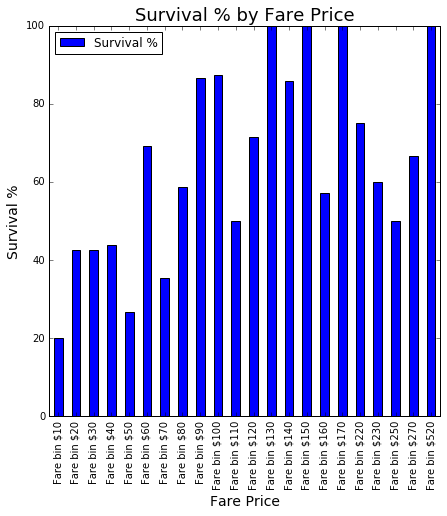

In [8]:
#create plot for dataframe
fx = fare_df.plot(kind='bar', figsize=(7, 7), color='b')
fx.set_title('Survival % by Fare Price', fontsize='18')
fx.set_xlabel('Fare Price', fontsize='14')
fx.set_ylabel('Survival %', fontsize='14')
plt.show()

Pretty big difference here. Anyone who paid over 70 dollars had at minimum a 50&sol;50 chance, while that same 50&sol;50 was the ceiling for the rest. In fact if we look at Fares between 0 and 10, and between 10 and 20, people had double the chance at surviving if they paid over 10 dollars. Next I look at the last numerical metric, Pclass. Just like most of the metrics, I looked at Pclass for the total, for survivors and deceased, and percent survived. I created a dataframe and bar graph for easy viewing as well.

In [9]:
#create list for new dataframe
pcl_list = []
for i in range(1,4):
    df = titanic_df[titanic_df['Pclass'] == i]
    total = df['Survived'].count()
    surv = df['Survived'].sum()
    dece = total - surv
    perc = surv/float(total) * 100
    pcl_list.append([total, surv, dece, perc])
    
#create dataframe
pclass_df = pd.DataFrame(pcl_list, columns=['Total', 'Survived', 'Deceased', 'Survival %'], index=['Pclass 1', 'Pclass2', 'Pclass3'])

#inspect dataframe
pclass_df

,Total,Survived,Deceased,Survival %
Pclass 1,216,136,80,62.962963
Pclass2,184,87,97,47.282609
Pclass3,491,119,372,24.236253


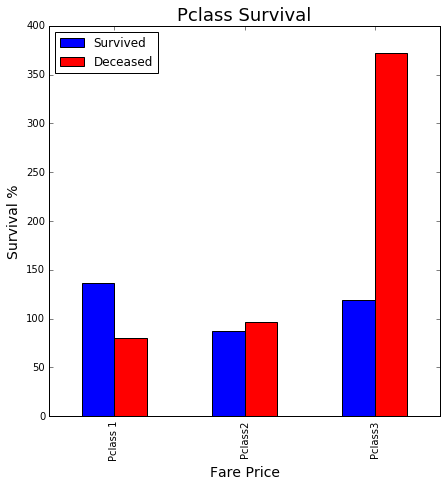

In [10]:
#create plot for dataframe
px = pclass_df[['Survived', 'Deceased']].plot(kind='bar', figsize=(7, 7), color=['b', 'r'])
px.set_title('Pclass Survival', fontsize='18')
px.set_xlabel('Fare Price', fontsize='14')
px.set_ylabel('Survival %', fontsize='14')
plt.show()

It looks like the second class people had about a 50&sol;50 chance, while the first class passengers had close to a two thirds chance of survivability. Third class was the largest populated, so we expected them to have a lower chance, but less than a quarter was all that made it.

## Explore and Analyze Non-Numerical Data

Time to explore the non-numerical data. I started with the easiest metric to convert to a numerical database, sex. As a simple 2 string metric, it was easy to count the amounts and just like our numerical metrics, inspect the dataframe and plot a bar graph.

In [11]:
#create list and index for dataframe
sexdex = titanic_df['Sex'].unique()
sex_list = []
for i in sexdex:
    df = titanic_df[titanic_df['Sex'] == i]
    total = df['Survived'].count()
    surv = df['Survived'].sum()
    dece = total - surv
    perc = surv/float(total) * 100
    sex_list.append([total, surv, dece, perc])
    
#create dataframe
sex_df = pd.DataFrame(sex_list, columns=['Total', 'Survived', 'Deceased', 'Survival %'], index=sexdex)


#inspect dataframe
sex_df

,Total,Survived,Deceased,Survival %
male,577,109,468,18.890815
female,314,233,81,74.203822


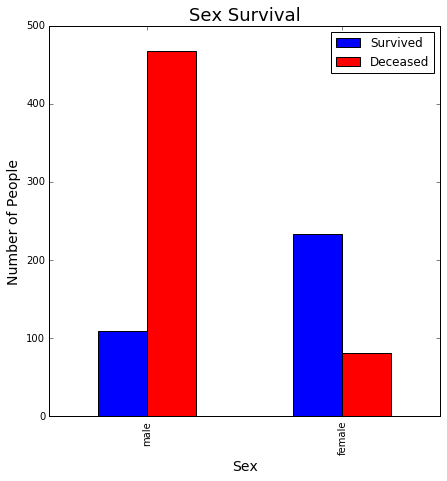

In [12]:
#create plot for dataframe
sx = sex_df[['Survived', 'Deceased']].plot(kind='bar', figsize=(7, 7), color=['b', 'r'])
sx.set_title('Sex Survival', fontsize='18')
sx.set_xlabel('Sex', fontsize='14')
sx.set_ylabel('Number of People', fontsize='14')
plt.show()

Wow&excl; I was not expecting that kinda result&excl; I figured more women would survive, but not a &percnt;50&plus; difference in survival rates. Less than &percnt;20 of males survived, yikes&excl; I mean less women died than men were saved. Next is cabin number. With the same kind of analysis as before, total, survived, deceased, and survival percentage.

In [13]:
#create list and index for dataframe
cabdex = ['A', 'B','C', 'D', 'E', 'n']
cab_list = []
for i in cabdex:
    if i == 'n':
        cab_ary = np.array(cab_list)
        total = titanic_df['Survived'].count() - cab_ary.sum(axis=0)[0]
        surv = titanic_df['Survived'].sum() - cab_ary.sum(axis=0)[1]
    else:
        df = titanic_df[titanic_df['Cabin'].str[0] == i]
        total = df['Survived'].count()
        surv = df['Survived'].sum()
    dece = total - surv
    perc = surv/float(total) * 100
    cab_list.append([total, surv, dece, perc])


#create dataframe
cab_df = pd.DataFrame(cab_list, columns=['Total', 'Survived', 'Deceased', 'Survival %'], index=cabdex)

#inspect dataframe
cab_df

,Total,Survived,Deceased,Survival %
A,15.0,7.0,8.0,46.666667
B,47.0,35.0,12.0,74.468085
C,59.0,35.0,24.0,59.322034
D,33.0,25.0,8.0,75.757576
E,32.0,24.0,8.0,75.000000
n,705.0,216.0,489.0,30.638298


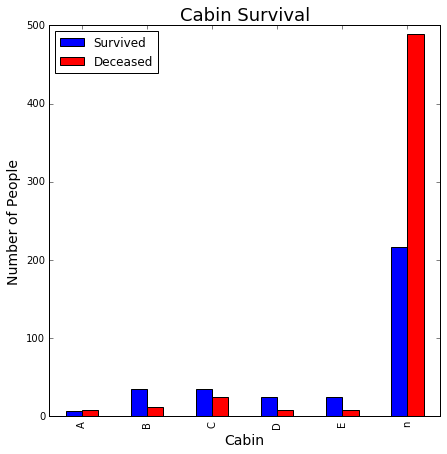

In [14]:
#create plot for dataframe
cx = cab_df[['Survived', 'Deceased']].plot(kind='bar', figsize=(7, 7), color=['b', 'r'])
cx.set_title('Cabin Survival', fontsize='18')
cx.set_xlabel('Cabin', fontsize='14')
cx.set_ylabel('Number of People', fontsize='14')
plt.show()

Like Fare, it seems better to have paid for a room than not. Seeing how most people with rooms had at least 50&sol;50 chance and 3&sol;4 at best for survival. While if you were in steerage, or other Cabinless bunks, you had about a &percnt;30 chance of survival. More info about the location of the cabins and those without is needed to make a better analysis of whether it played a part in survival. Next was Embarkation location, another fairly easy metric with only 4 strings to count.

In [15]:
#create list and index for dataframe
embdex = ['Cherbourg', 'Queenstown', 'Southhampton', 'Unknown']
emb_list = []

for i in embdex:
    if i == 'Unknown':
        emb_ary = np.array(emb_list)
        total = titanic_df['Survived'].count() - emb_ary.sum(axis=0)[0]
        surv = titanic_df['Survived'].sum() - emb_ary.sum(axis=0)[1]
    else:
        df = titanic_df[titanic_df['Embarked'] == i[0]]
        total = df['Survived'].count()
        surv = df['Survived'].sum()
    dece = total - surv
    perc = surv/float(total) * 100
    emb_list.append([total, surv, dece, perc])

#create dataframe
emb_df = pd.DataFrame(emb_list, columns=['Total', 'Survived', 'Deceased', 'Survival %'], index=embdex)

#inspect dataframe
emb_df

,Total,Survived,Deceased,Survival %
Cherbourg,168.0,93.0,75.0,55.357143
Queenstown,77.0,30.0,47.0,38.961039
Southhampton,644.0,217.0,427.0,33.695652
Unknown,2.0,2.0,0.0,100.000000


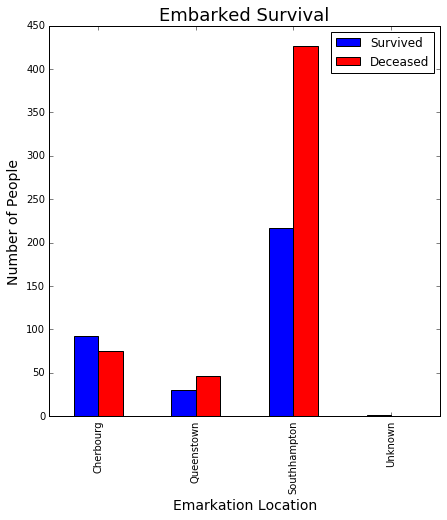

In [16]:
#create plot for dataframe
ex = emb_df[['Survived', 'Deceased']].plot(kind='bar', figsize=(7, 7), color=['b', 'r'])
ex.set_title('Embarked Survival', fontsize='18')
ex.set_xlabel('Emarkation Location', fontsize='14')
ex.set_ylabel('Number of People', fontsize='14')
plt.show()

Unlike some of our other metrics, where one got on from does not seem to have any real correltaion to survivablity. So lastly I tried to look at Ticket and Name to see if they played a roll. First I grouped the data by ticket and tried to look at the info. But Name or Ticket are too spread out to really make any heads or tails of anything we get from either metric. 

In [17]:
#try to see if Ticket number played a roll
tick_group = titanic_df.groupby('Ticket')
tick_list = []
for i in tick_group:
    ticket = i[1]['Ticket'].iloc[0]
    survived = i[1]['Survived'].sum()
    total = len(i[1]['Survived'])
    deceased = total - survived
    tick_list.append([ticket, survived, deceased, total, ((survived/float(total)) * 100)])

#create dataframe from list
tick_df = pd.DataFrame(tick_list, columns=['Ticket', 'Survivors', 'Deceased', 'Total', '% Survived'])

#inspect dataframe
tick_df.sort_values(['% Survived', 'Ticket']).head()

,Ticket,Survivors,Deceased,Total,% Survived
2,110465,0,2,2,0.0
5,111240,0,1,1,0.0
6,111320,0,1,1,0.0
12,112050,0,1,1,0.0
13,112052,0,1,1,0.0


## Parents and Children

Now for my last question. Kind of a more personal one since I have a family of my own and am interested in the data about families. First I made a datframe of only passengers with parents or children onboard, and looked at the head to check out the data.

In [18]:
#create dataframe of people with parents or children aboard
family_df = titanic_df[titanic_df['Parch'] > 0]


#inspect dataframe
family_df.sort_values('Ticket').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,E67,S
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,E68,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,S
523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,B18,C
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C


It looked to me that families all shared the same ticket numbers. So I tested this by getting the number of unique tickets, and then the number of unique family names and comparing them.

In [19]:
#get number of unique tickets
len(family_df['Ticket'].unique())

100

In [20]:
#get number of unique family names
name_list = []
for name in family_df['Name']:
    name_list.append(name.split(',')[0])
name_ser = pd.Series(name_list)
len(name_ser.unique())

100

And viola, they do indeed all share the same ticket number&excl; Now I can use the ticket metric to sort families into groups. Then I look at the sudonyms for each member of each family, as well as the age for the adults. If they had a Mr. or Mrs. and are over 20 I added them to the parents list. If they were under 20 or they had a Miss or Master I added them to the children list. Finally I got the mean for both groups and printed them out.

In [21]:
#Create list of parents and children
par_list = []
chi_list = []
for info in family_df.groupby('Ticket'):
    for mem in info[1].values:
        sud = mem[3].split(' ')[1]
        if sud == 'Mr.' or sud == 'Mrs.':
            if mem[5] >= 20:
                par_list.append(mem[5])
            else:
                chi_list.append(mem[5])
        elif sud == 'Master.' or sud == 'Miss.':
            if mem[5] > 0:
                chi_list.append(mem[5])
        
#create series from the lists
par_ser = pd.Series(par_list)
chi_ser = pd.Series(chi_list)

#inspect parents series 
par_ser.describe()

count    85.000000
mean     37.805882
std      11.073374
min      20.000000
25%      29.000000
50%      37.000000
75%      45.000000
max      65.000000
dtype: float64

In [22]:
#inspect children series
chi_ser.describe()

count    102.000000
mean       9.923235
std        8.406135
min        0.420000
25%        3.000000
50%        8.000000
75%       16.000000
max       39.000000
dtype: float64

Seems that the average age of parents was just under 38 while the average for kids was right under 10. Interesting, even though it is just a approximation of the groups since I did not fully seperate out all the children and parents.

## Conclusion and Extra Data

So in conclusion, it seems that there were several groups of people aboard the Titanic that had a better chance of survival. Either Class, Fare, or Sex were the biggest factors that aided in survival, but it was not a straight line. Many people from all groups were helped by luck and luck alone to make it out alive. Also parents and children aboard had a large sampleing of ages, but avaeraged out to what I assume is a normal mean. All in all it was very fun looking at the data for this epic, I just wish I had more data to sift through to tell a more complete story of the survivors!

This analysis of the Titanic data is limited in several ways. There are missing data pieces for at lest three metrics including Age and Cabin. Without all of the pieces we can only make an analysis of what we have, limiting the integrity of the data. Also I only looked at the data through statistical calculations without streneous testing, making any analysis of the data a premature assumption. More data would have made for a clearer picture of the outcome. For instance, knowing whether or not people were in steerage, or other places on the ship without Cabins, and the location of all rooms on the ship. With the extra data not included we could form more percise analysis of what happened to those people on this austere occasion.

Below is the entire data set to look through. 

In [23]:
#full Titanic dataframe
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C
